In [1]:
import importlib
import os

os.chdir('/code')

from auction_engine import engine
from auction_engine.one_inch import get_reference_rate
from tests.utils import generate_limit_orders

importlib.reload(engine)

<module 'auction_engine.engine' from '/code/auction_engine/engine.py'>

In [2]:
# Auction parameters:
from_token = 'ETH'
to_token = 'USDT'

In [3]:
reference_rate = get_reference_rate(from_token, to_token, amount=1)
reference_rate

ReferenceRate(1570.101789 USDT/ETH)

In [4]:
num_buys = 4000
num_sells = 4000

buy_gen = range(num_buys)
sell_gen = range(num_buys, num_buys + num_sells)

buy_orders = generate_limit_orders(
    order_id_generator=buy_gen,
    wallet_id_generator=buy_gen,
    from_token=from_token,
    to_token=to_token,
    base_rate=reference_rate,
)
sell_orders = generate_limit_orders(
    order_id_generator=sell_gen,
    wallet_id_generator=sell_gen,
    from_token=to_token,
    to_token=from_token,
    base_rate=reference_rate,
)
all_orders = buy_orders + sell_orders

In [5]:
auction = engine.Auction(
    from_token=from_token,
    to_token=to_token,
    orders=all_orders,
)
auction_result = auction.run()

2022-08-22 10:49:50 INFO     Starting auction
2022-08-22 10:49:50 INFO     Compiling order book data
2022-08-22 10:49:51 INFO     Excluding non-marketable orders from auction
2022-08-22 10:49:51 INFO     Constructing optimization problem
2022-08-22 10:49:51 INFO     Optimizing
2022-08-22 10:49:51 INFO     Validating clearing_rate 1570.8325119703265 with 1inch
2022-08-22 10:49:51 INFO     Updating the order book
2022-08-22 10:49:51 INFO     Compiling transactions


In [6]:
len(auction_result.transactions)

1466

2022-08-22 10:49:58 INFO     Compiling order book data


<AxesSubplot:title={'center':'Auction Order Book ETH/USDT'}, xlabel='amount', ylabel='limit_rate'>

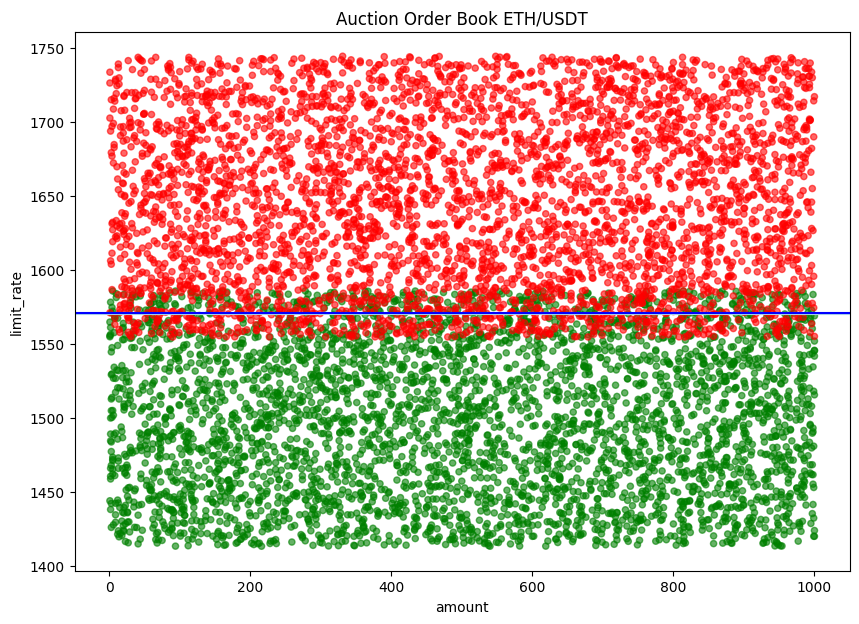

In [7]:
auction.plot_order_book(
    reference_rate=reference_rate.rate,
    clearing_rate=auction_result.clearing_rate,
    marketable_only=True,
)

In [10]:
auction.order_book.groupby('side')[['optimal_fill', 'standard_amount', 'marketable']].sum()

,optimal_fill,standard_amount,marketable
side,,,
BUY,5533.457301,2026980,4000
SELL,5533.457301,2015277,4000


In [10]:
len(auction.order_book)

8000